In [35]:
import blimpy
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from sigpyproc.readers import FilReader
%matplotlib inline

In [11]:
#Load the h5 file
h5file=Path('/home/kevin/kevinlukechime/SLOWTRANSIENT/TESTING/clustering/filterbanks/spliced_blc4041424344454647_guppi_59103_01372_PSR_B2021+51_0009.rawspec.0002.h5')



In [14]:
#convert the h5 file to fil file with blimpy utils
console = "h52fil {0:s} -o {1:s}".format( str(h5file), 
                                         str(h5file.parent)+"/")
os.system(console)


blimpy.waterfall INFO     __write_to_fil_light: Writing the spectra matrix for /home/kevin/kevinlukechime/SLOWTRANSIENT/TESTING/clustering/filterbanks/spliced_blc4041424344454647_guppi_59103_01372_PSR_B2021+51_0009.rawspec.0002.fil in one go.
blimpy.waterfall INFO     Conversion time: 0.29sec


0

In [67]:
#Load the converted fil file
filfile_path=Path('/home/kevin/kevinlukechime/SLOWTRANSIENT/TESTING/clustering/filterbanks/spliced_blc4041424344454647_guppi_59103_01372_PSR_B2021+51_0009.rawspec.0002.fil')
fil_file=FilReader(filfile_path.as_posix())
fil_file.header

Header(filename='/home/kevin/kevinlukechime/SLOWTRANSIENT/TESTING/clustering/filterbanks/spliced_blc4041424344454647_guppi_59103_01372_PSR_B2021+51_0009.rawspec.0002.fil', data_type='filterbank', nchans=315392, foff=-0.00286102294921875, fch1=1926.26953125, nbits=32, tsamp=1.073741823999999, tstart=59103.01587962963, nsamples=279, nifs=1, coord=<SkyCoord (ICRS): (ra, dec) in deg
    (305.7077, 51.91393972)>, azimuth=<Angle 0. deg>, zenith=<Angle 0. deg>, telescope='GBT', backend='CHIME', source='PSR_B2021+51', frame='topocentric', ibeam=0, nbeams=0, dm=0, period=0, accel=0, signed=False, rawdatafile='', hdrlens=[300], datalens=[351977472], filenames=['/home/kevin/kevinlukechime/SLOWTRANSIENT/TESTING/clustering/filterbanks/spliced_blc4041424344454647_guppi_59103_01372_PSR_B2021+51_0009.rawspec.0002.fil'], nsamples_files=[279], tstart_files=[59103.01587962963])

In [64]:
#Use sigpyproc3 tools to dedisperse and downsample the data
tdownsamp=1
subband=512
DM=22.5

data = fil_file.read_block(0, fil_file.header.nsamples)
data = data.dedisperse(DM)
data = data.downsample(tdownsamp, subband)
data = data.normalise()
tseries = data.get_tim()

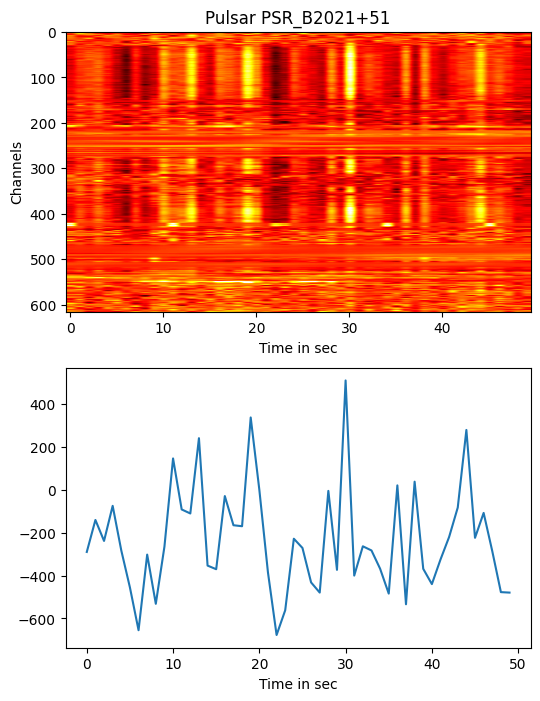

In [66]:
#Plot the data
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
plt.title("Pulsar {}".format(fil_file.header.source))
plt.xlabel('Time in sec')
plt.ylabel('Channels')
plt.imshow(data[:,100:150], aspect='auto', vmin=-3, vmax=3,cmap='hot')
plt.subplot(2,1,2)
plt.xlabel('Time in sec')
plt.plot(tseries[100:150])
plt.savefig('water.jpg')